<a href="https://colab.research.google.com/github/aarohisp/GitWorkshop2/blob/main/Aarohi__AIML_Coding_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Greetings,

I'm Aarohi Panicker, and I'm thrilled to connect with you. As a TY CS student, I'm deeply passionate about innovation and problem-solving. I've got a solid foundation in Python and machine learning algorithms, and I'm excited about applying my skills to real-world challenges. I also hold a diploma in business management, adding a unique perspective to my technical expertise. Currently, I'm pursuing an honors degree in artificial intelligence and machine learning, driven by a keen interest in pushing the boundaries of what AI can achieve.<BR>

One of the highlights of my journey so far has been my participation in the Women Engineers Program, a prestigious initiative offered by TalentSprint and supported by Google. Through this program, I've had the opportunity to learn from industry experts and gain invaluable insights into the world of technology. It's been an enriching experience that has further fueled my passion for learning.<BR>

I genuinely believe in the transformative power of AI&ML to make a positive impact on our lives, and I'm eager to contribute to your team and be a part of that change.<BR>

Looking forward to the possibility of collaborating with you!

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.5 MB/s eta 0:00:00


In [284]:
#Importing all Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, ParameterGrid
from sklearn.cluster import KMeans
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from scipy.stats import uniform, randint

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [229]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/DS_ML Coding challenge/DS_ML training dataset.csv')
test = pd.read_csv('/content/drive/MyDrive/DS_ML Coding challenge/DS_ML testing dataset.csv')
df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB


In [41]:
#Exloring the Statistics of the numerical variables
df.describe()

,Sourcing Cost
count,550176.000000
mean,108.817286
std,104.390093
min,-196.070000
25%,57.000000
50%,132.000000
75%,146.150000
max,32632.500000


In [42]:
#count of null/missing values in datset records
df.isna().sum()

ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64

In [43]:
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)

print("\n The number of duplicate values present: ", df.duplicated().sum())


Duplicate Rows:
        ProductType Manufacturer Area Code Sourcing Channel Product Size  \
63            NTM2           X1       A29           DIRECT        Small   
68            NTM2           X2       A25           DIRECT        Small   
86            NTM1           X1        A7             ECOM        Small   
88            NTM2           X1        A7             ECOM        Large   
93            NTM2           X1       A19           DIRECT        Large   
...            ...          ...       ...              ...          ...   
550171        NTM2           X1        A5           DIRECT        Large   
550172        NTM3           X1       A14           DIRECT        Large   
550173        NTM2           X1        A5           DIRECT        Small   
550174        NTM2           X1        A7           DIRECT        Small   
550175        NTM1           X1        A3           DIRECT        Small   

       Product Type Month of Sourcing  Sourcing Cost  
63           Powder       

Inferences
<ol>
<li>No feature has null/missing values in this dataset</li>

<li>There is only 1 numerical column, sourcing cost, all other columns/features are categorical and will need to be converted.</li>

<li>Based on this it can be inferred that out of all the features present, 'Sourcing Cost' is a numerical feature. </li>
    <li>There are 550176 data points present in the train dataset</li>
    <li>The range of values of sourcing cost is from -196.07, which indicates nagative values and will have to be handled before model training, to 32632.50 which is a large positive value</li>
    <li> 542796 duplicate records present in the dataset but since reason is already mentioned in dataset description, they have importance in the final analysis</li>
</ol>

In [44]:
#converting 'Month of Sourcing' to datetime format
df['Datetime Month of Sourcing'] = pd.to_datetime(df['Month of Sourcing'], format='%b-%y')
df['Sourcing Month'] = df['Datetime Month of Sourcing'].dt.month
df['Sourcing year'] = df['Datetime Month of Sourcing'].dt.year

test['Datetime Month of Sourcing'] = pd.to_datetime(test['Month of Sourcing'], format='%b-%y')
test['Sourcing Month'] = test['Datetime Month of Sourcing'].dt.month
test['Sourcing year'] = test['Datetime Month of Sourcing'].dt.year

df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost,Datetime Month of Sourcing,Sourcing Month,Sourcing year
0,NTM3,X1,A28,WHOLESALE,Large,Powder,May-21,10.16,2021-05-01,5,2021
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28,2020-10-01,10,2020
2,NTM3,X2,A20,DIRECT,Large,Powder,Dec-20,12.46,2020-12-01,12,2020
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22,2021-02-01,2,2021
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76,2020-11-01,11,2020
...,...,...,...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47,2020-07-01,7,2020
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56,2020-10-01,10,2020
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64,2021-03-01,3,2021
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04,2021-02-01,2,2021


#Performing EDA and Data preprocessing

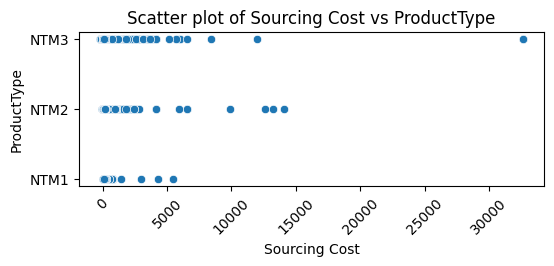

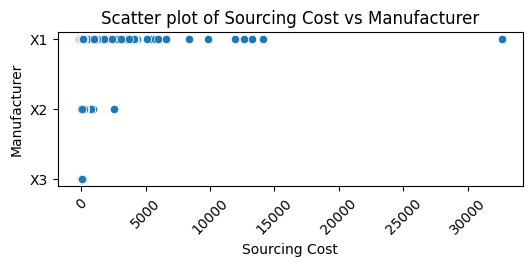

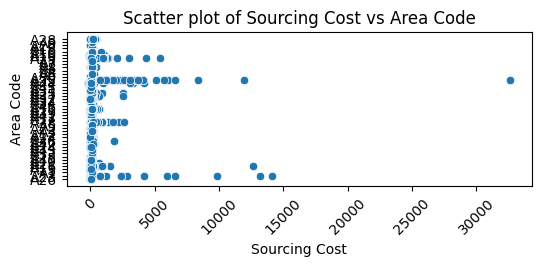

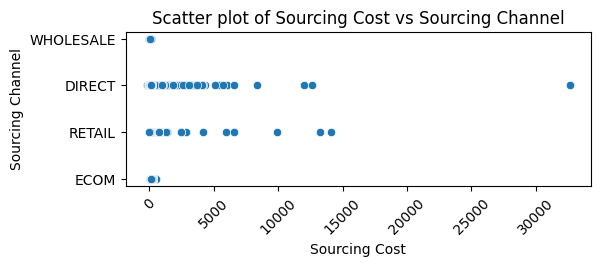

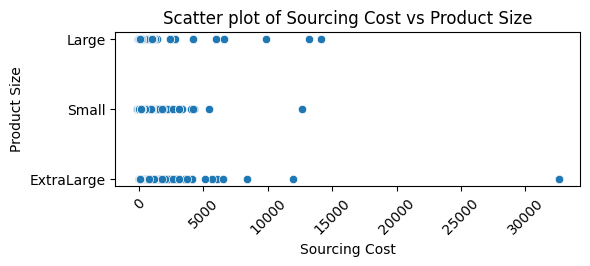

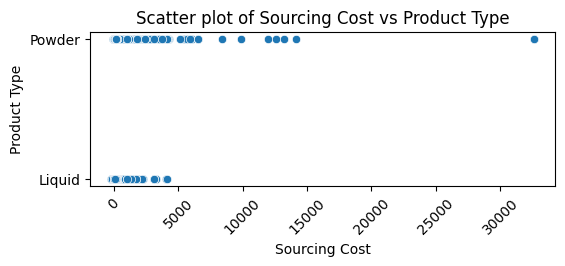

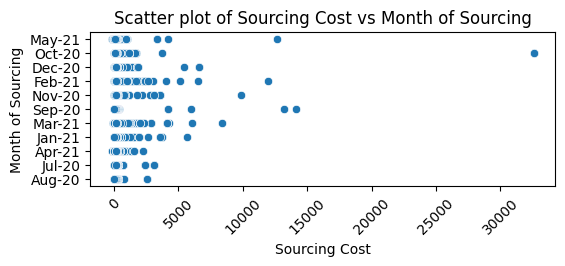

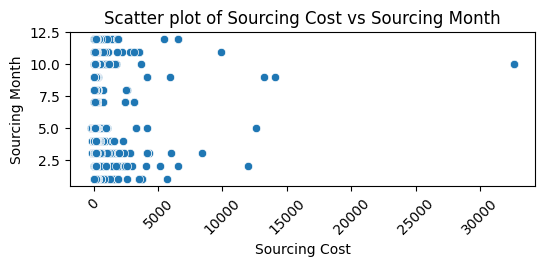

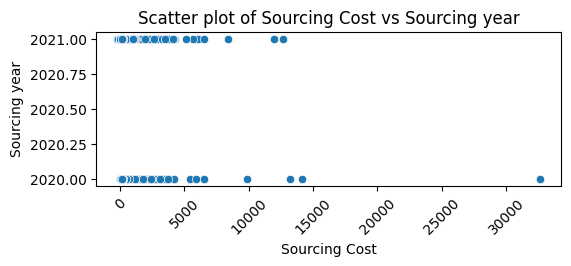

In [14]:
# Plot scatter plots for each feature against the target variable
for feature in features:
    plt.figure(figsize=(6, 2))
    sns.scatterplot(data=df, x='Sourcing Cost', y=feature)
    plt.title(f'Scatter plot of Sourcing Cost vs {feature}')
    plt.xticks(rotation=45)
    plt.show()

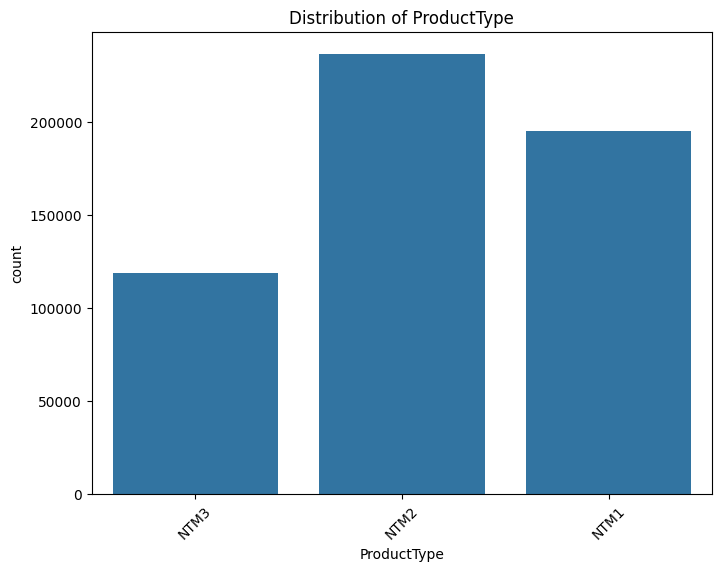

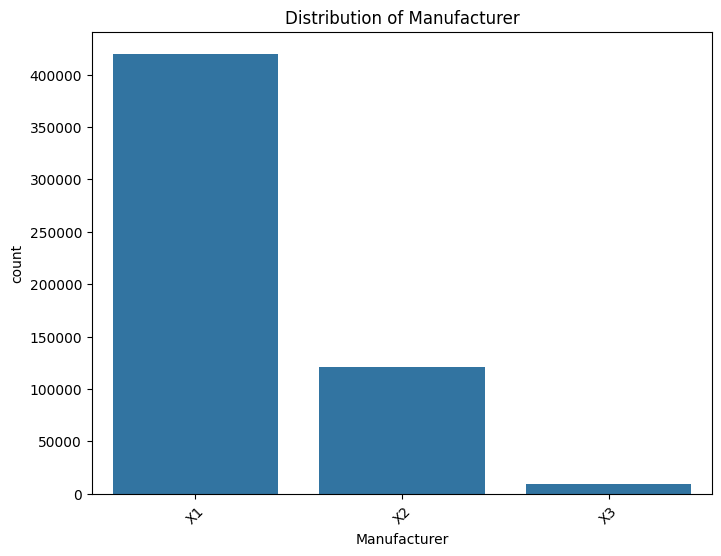

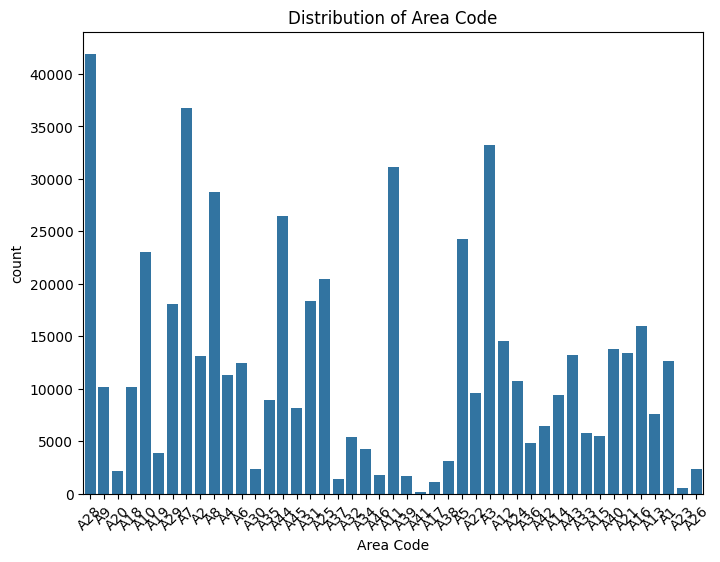

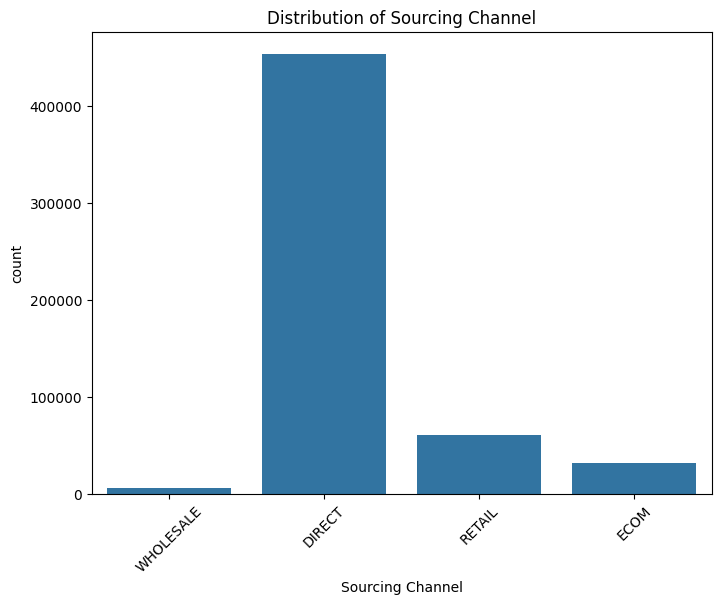

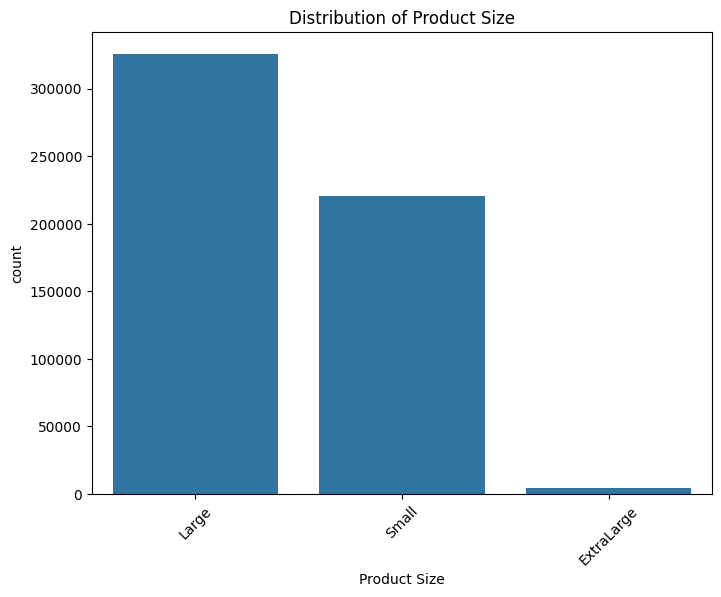

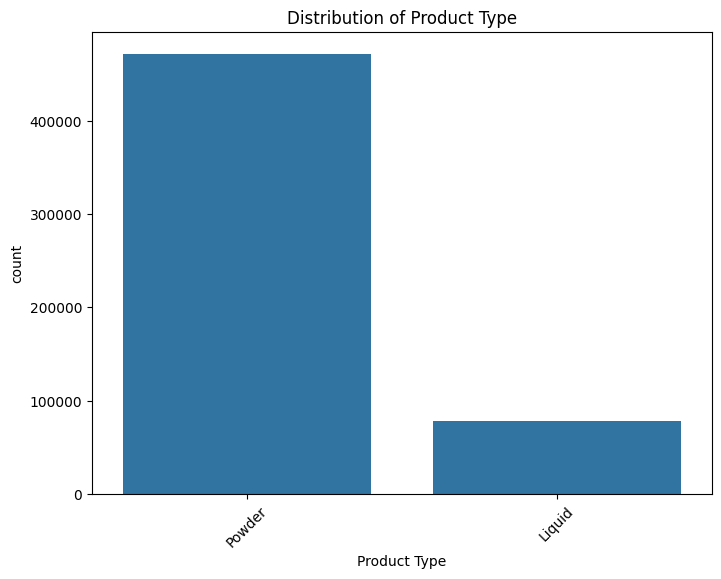

In [10]:
#visualizing distributions of categorical variables
categorical_columns = ['ProductType', 'Manufacturer', 'Area Code', 'Sourcing Channel', 'Product Size', 'Product Type']
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45)
    plt.show()

In [148]:
#getting count of unique values in each feature
features = df.drop('Sourcing Cost', axis=1)
unique_value_counts = features.nunique()
print("\nCount of unique values in each feature:")
print(unique_value_counts)


Count of unique values in each feature:
ProductType                    3
Manufacturer                   3
Area Code                     45
Sourcing Channel               4
Product Size                   3
Product Type                   2
Month of Sourcing             11
Datetime Month of Sourcing    11
Sourcing Month                11
Sourcing year                  2
Cluster                       25
dtype: int64


Since area code has 45 unique values and doesnt help much in interpreation as it is, trying to use unsupervised method liek clustering to perform cluster analysis and identify trends in the relationships.

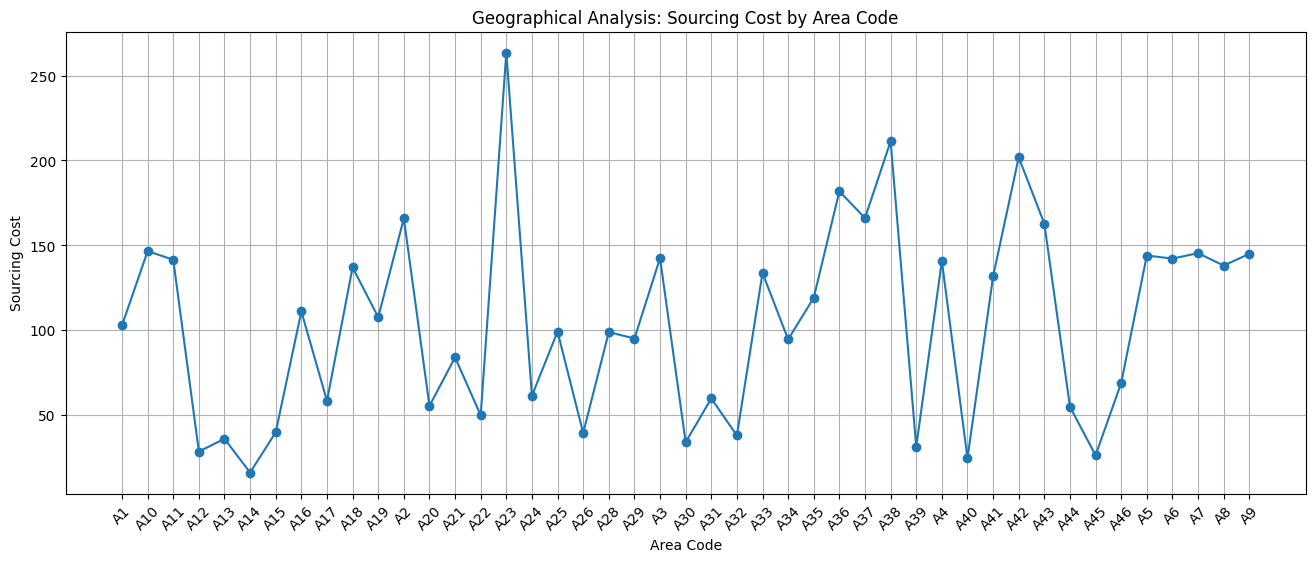

In [26]:
plt.figure(figsize=(16, 6))

#grouping by 'Area Code' and calculating the mean sourcing cost for each area
area_cost_mean = df.groupby('Area Code')['Sourcing Cost'].mean()

plt.plot(area_cost_mean.index, area_cost_mean.values, marker='o', linestyle='-')
plt.xticks(rotation=45)

plt.title('Geographical Analysis: Sourcing Cost by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Sourcing Cost')
plt.grid(True)
plt.show()

This graph shows that A23 Area code had the highest sourcing cost while A14 had the lowest sourcing cost with values ranging from near 0 to near 210

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

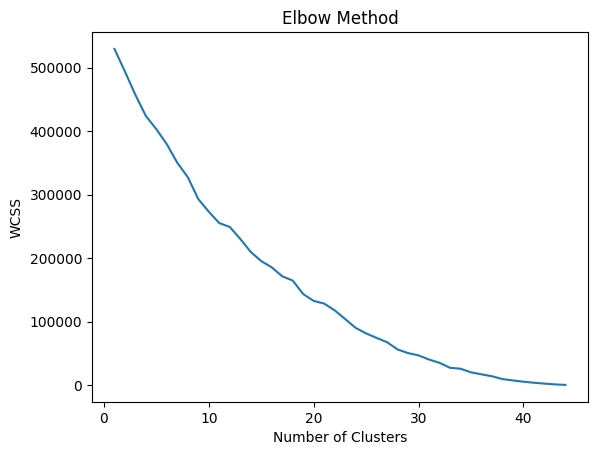

In [232]:
one_hot_encoded = pd.get_dummies(df['Area Code'], prefix='Area')
wcss = []

# Try different values of k
for k in range(1, 45):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(one_hot_encoded)
    wcss.append(kmeans.inertia_)
# Plot the elbow curve
plt.plot(range(1, 45), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

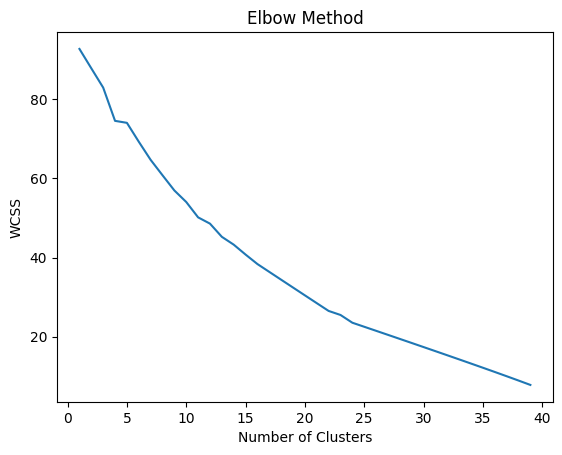

In [242]:
one_hot_encoded_test = pd.get_dummies(test['Area Code'], prefix='Area')
wcss = []

# Try different values of k
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(one_hot_encoded_test)
    wcss.append(kmeans.inertia_)
# Plot the elbow curve
plt.plot(range(1, 40), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Using elbow method, determined that k=25 was suitable for clustering purposes

In [243]:
# One-hot encoding all categorical variables except area code as it will increase dimensionality of the dataset
categorical_columns = ['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type']
df_encoded = pd.get_dummies(df, columns=categorical_columns, dtype = 'int')
test_encoded = pd.get_dummies(test, columns=categorical_columns, dtype = 'int')
df_encoded.head()

,Area Code,Month of Sourcing,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
0,A28,May-21,10.16,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1
1,A9,Oct-20,134.28,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
2,A20,Dec-20,12.46,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
3,A18,Feb-21,107.22,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1
4,A28,Nov-20,197.76,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


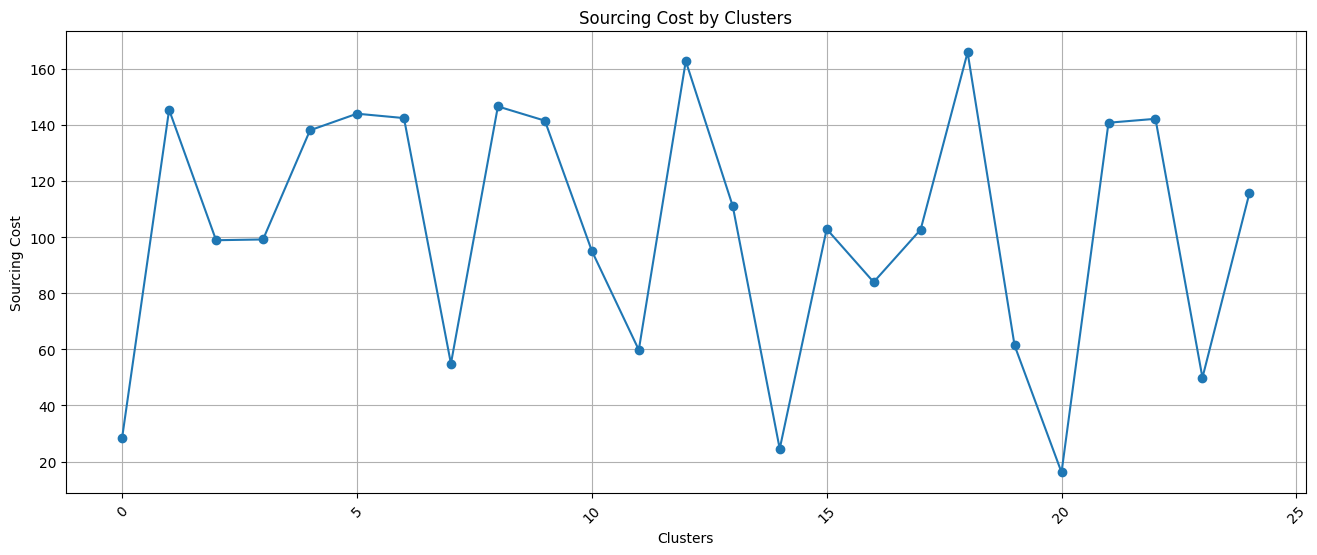

In [87]:
plt.figure(figsize=(16, 6))

#grouping by 'Area Code' and calculating the mean sourcing cost for each area
area_cost_mean = df.groupby('Cluster')['Sourcing Cost'].mean()

plt.plot(area_cost_mean.index, area_cost_mean.values, marker='o', linestyle='-')
plt.xticks(rotation=45)

plt.title('Sourcing Cost by Clusters')
plt.xlabel('Clusters')
plt.ylabel('Sourcing Cost')
plt.grid(True)
plt.show()

In [237]:
one_hot_encoded

,Area_A1,Area_A10,Area_A11,Area_A12,Area_A13,Area_A14,Area_A15,Area_A16,Area_A17,Area_A18,...,Area_A42,Area_A43,Area_A44,Area_A45,Area_A46,Area_A5,Area_A6,Area_A7,Area_A8,Area_A9
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
550172,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
550173,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
550174,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [245]:
optimal_k = 25

kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(one_hot_encoded)
kmeans.fit(one_hot_encoded_test)

# Getting cluster labels for training and test data separately
train_cluster_labels = kmeans.predict(one_hot_encoded)
test_cluster_labels = kmeans.predict(one_hot_encoded_test)

# Assigning cluster labels to the training and test datasets
df_encoded['Cluster'] = train_cluster_labels
test_encoded['Cluster'] = test_cluster_labels

# Drop irrelevant columns
columns_to_drop = ["Area Code", "Month of Sourcing"]
df_encoded_analysis = df_encoded.drop(columns_to_drop, axis=1)
test_encoded_analysis = test_encoded.drop(columns_to_drop, axis=1)

# Analyzing clusters
cluster_analysis = df_encoded_analysis.groupby('Cluster').mean()

# #getting cluster labels
# cluster_labels = kmeans.labels_
# df_encoded['Cluster'] = cluster_labels
# test_encoded['Cluster'] = cluster_labels
# columns_to_drop = ["Area Code", "Month of Sourcing", "Datetime Month of Sourcing", "Sourcing Month", "Sourcing year"]  # Add other column names as needed
# df_encoded_analysis = df_encoded.drop(columns_to_drop, axis=1)
# test_encoded_analysis = test_encoded.drop(columns_to_drop, axis = 1)
# #analyzing clusters
# cluster_analysis = df_encoded_analysis.groupby('Cluster').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [58]:
cluster_analysis

,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
Cluster,,,,,,,,,,,,,,,,
0,102.873505,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
1,146.584230,0.351676,0.589639,0.058685,1.000000,0.000000,0.0,0.654724,0.345276,0.000000,0.000000,0.000000,0.595951,0.404049,0.000000,1.000000
2,98.888291,0.053095,0.541777,0.405128,1.000000,0.000000,0.0,0.965462,0.000000,0.000000,0.034538,0.000000,0.324794,0.675206,0.072987,0.927013
3,138.080526,0.632768,0.108856,0.258376,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.936953,0.063047,0.245169,0.754831
4,143.994619,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.654709,0.345291,0.000000,1.000000
5,141.507634,0.388866,0.563145,0.047989,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.646717,0.353283,0.209861,0.790139
6,96.237220,0.283529,0.312550,0.403921,0.689622,0.310378,0.0,0.755276,0.012752,0.187254,0.044717,0.046441,0.572343,0.381215,0.247803,0.752197
7,142.433748,0.673083,0.326917,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.397961,0.602039,0.159503,0.840497
8,145.385077,0.438036,0.561964,0.000000,1.000000,0.000000,0.0,0.458323,0.541677,0.000000,0.000000,0.000000,0.574109,0.425891,0.084988,0.915012


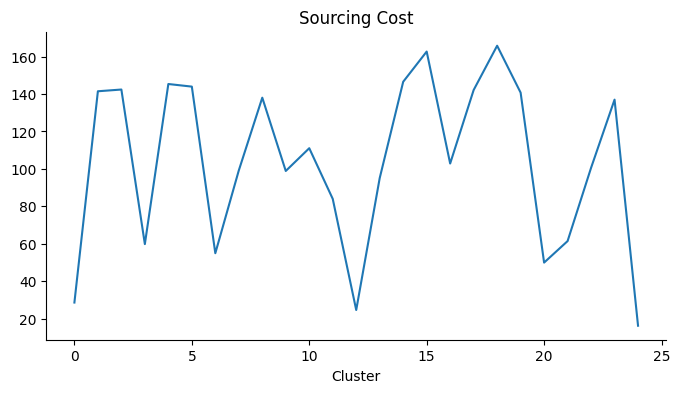

In [64]:
#visualizing trend of sourcing cost in clusters

cluster_analysis['Sourcing Cost'].plot(kind='line', figsize=(8, 4), title='Sourcing Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

Performing Time-based analysis on the data


*   to check suitability for analysing as a time-series data
*   to check trend of sourcing cost over time


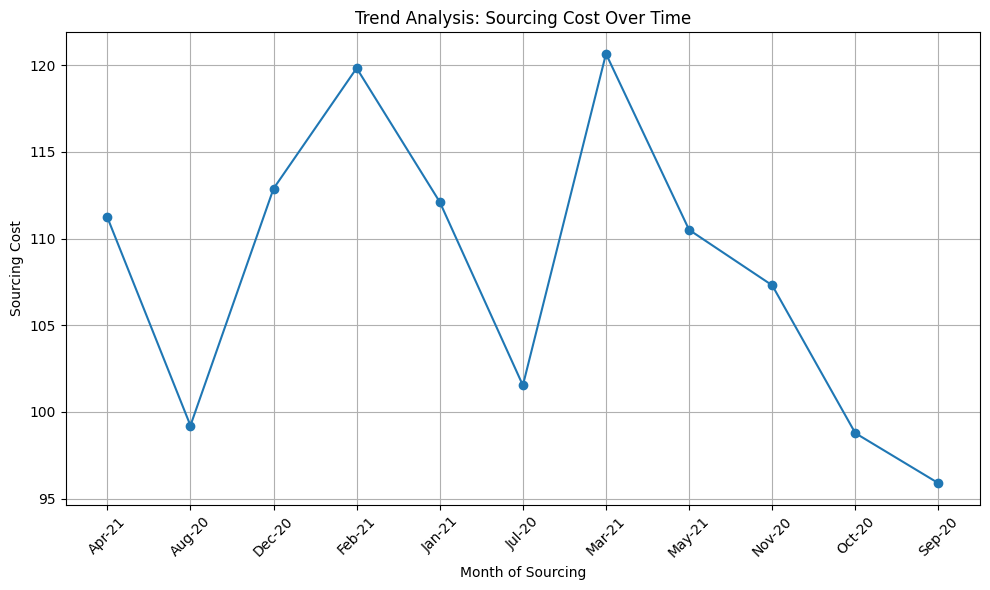

In [28]:
#trend analysis of sourcing cost over time
plt.figure(figsize=(10, 6))

#grouping by 'Month of Sourcing' and calculating the mean sourcing cost for each month
month_cost_mean = df.groupby('Month of Sourcing')['Sourcing Cost'].mean()

plt.plot(month_cost_mean.index, month_cost_mean.values, marker='o', linestyle='-')
plt.xticks(rotation=45)

plt.title('Trend Analysis: Sourcing Cost Over Time')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.grid(True)
plt.tight_layout()
plt.show()

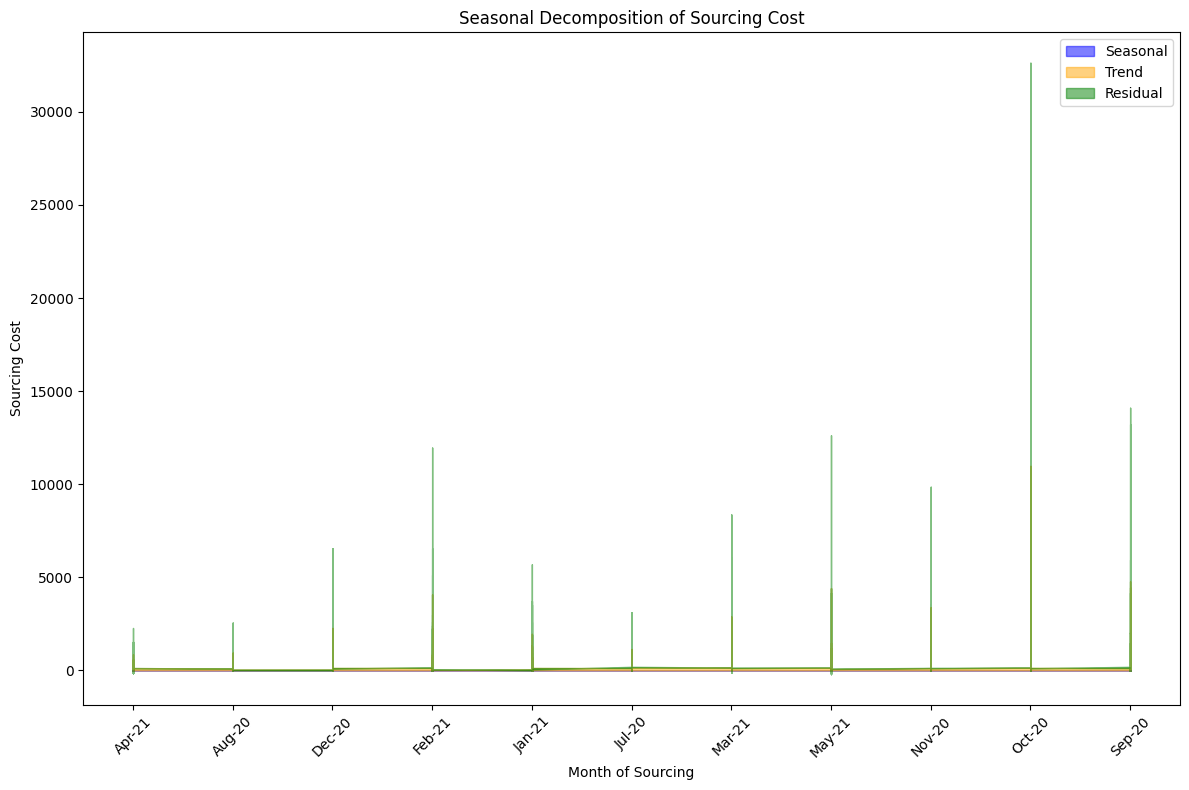

In [33]:
#stacked area plot for clear visualization of how each component contributes to the overall time series
df.set_index('Month of Sourcing', inplace=True)

# Sort the index
df.sort_index(inplace=True)

# Decompose time series
decomposition = seasonal_decompose(df['Sourcing Cost'], period=3, model='additive')

# Extract decomposition components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot stacked area plot for decomposition components
plt.figure(figsize=(12, 8))

plt.fill_between(df.index, seasonal, color='blue', alpha=0.5, label='Seasonal')
plt.fill_between(df.index, seasonal + trend, seasonal, color='orange', alpha=0.5, label='Trend')
plt.fill_between(df.index, seasonal + trend + residual, seasonal + trend, color='green', alpha=0.5, label='Residual')

plt.legend(loc='best')
plt.title('Seasonal Decomposition of Sourcing Cost')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

It can be observed in this seasonal decomposition plot that there is a high value in Oct-2021, suggesting that sourcing costs tend to be higher in October compared to other months and low value in Aug-2021, indicating that sourcing costs are lower during this month compared to other months.<br>

This indicates strong seasonality in the data.

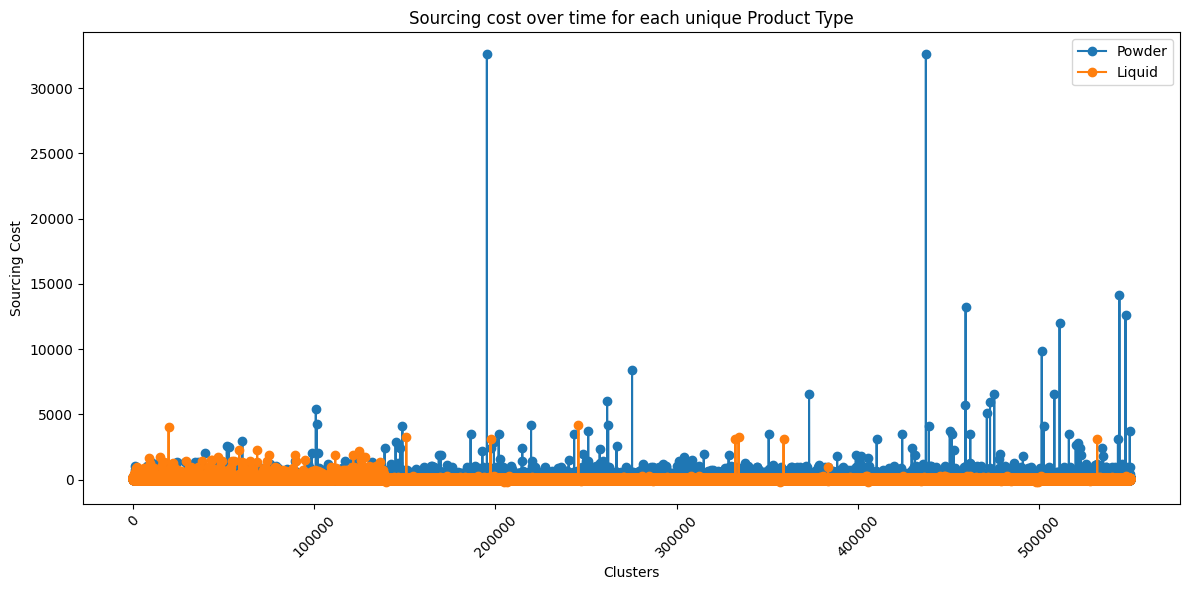

In [72]:
plt.figure(figsize=(12, 6))

for product_type in df['Product Type'].unique():
    filtered_data = df[df['Product Type'] == product_type]
    plt.plot(filtered_data.index, filtered_data['Sourcing Cost'], label=product_type, marker='o')

plt.title('Sourcing cost over time for each unique Product Type')
plt.xlabel('Clusters')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

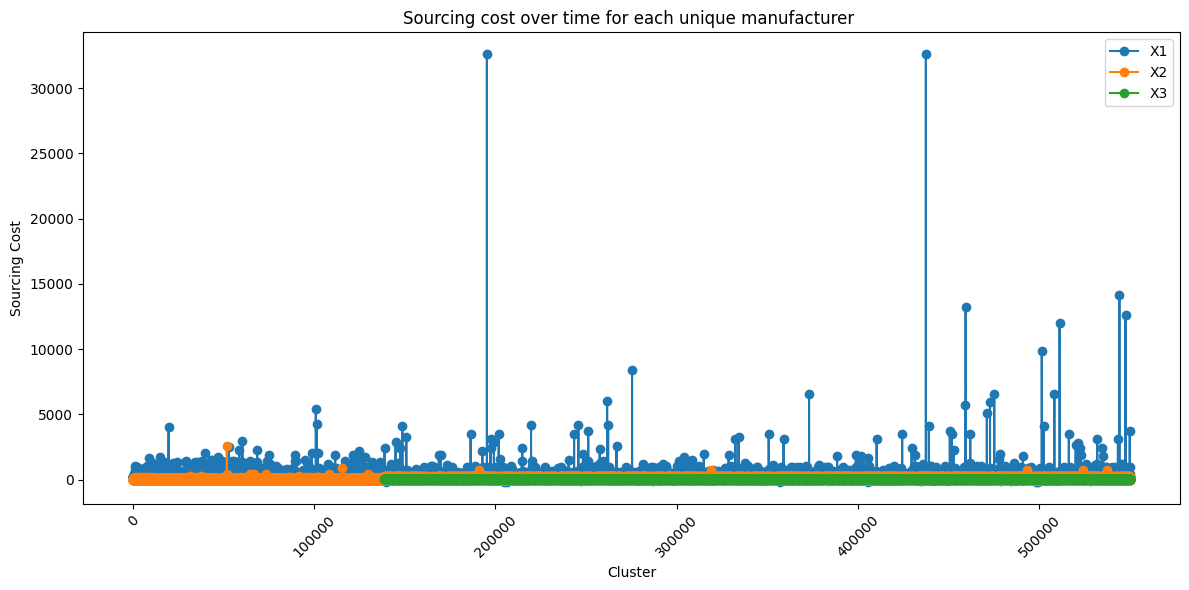

In [73]:
plt.figure(figsize=(12, 6))

for manufacturer in df['Manufacturer'].unique():
    filtered_data = df[df['Manufacturer'] == manufacturer]
    plt.plot(filtered_data.index, filtered_data['Sourcing Cost'], label=manufacturer, marker='o')

plt.title('Sourcing cost over time for each unique manufacturer ')
plt.xlabel('Cluster')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

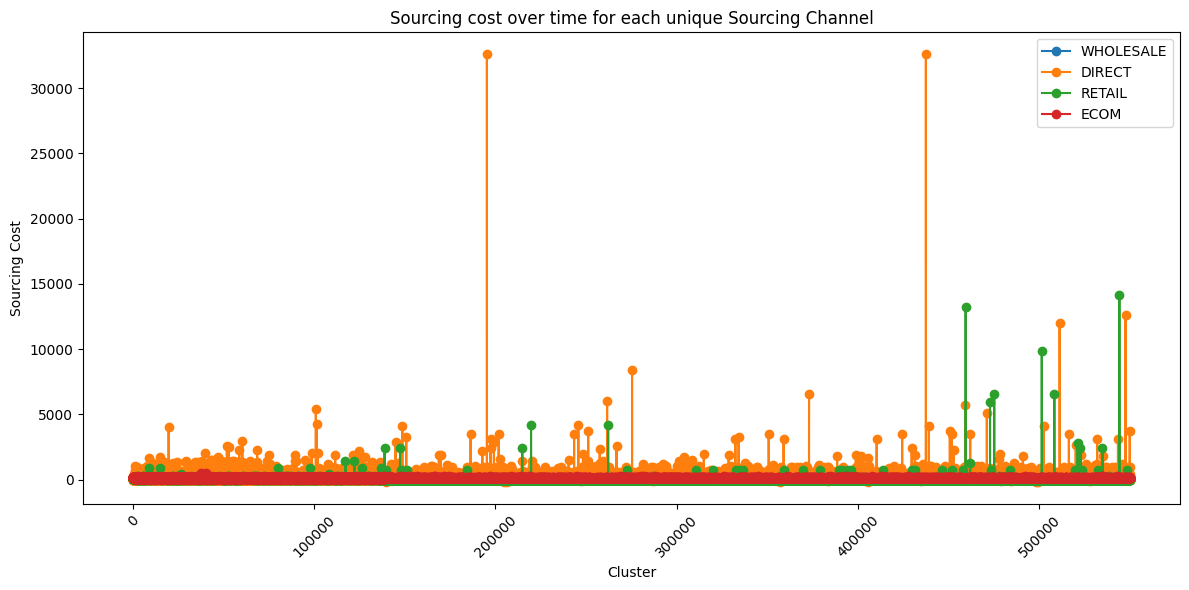

In [74]:
plt.figure(figsize=(12, 6))

for sourcing_channel in df['Sourcing Channel'].unique():
    filtered_data = df[df['Sourcing Channel'] == sourcing_channel]
    plt.plot(filtered_data.index, filtered_data['Sourcing Cost'], label=sourcing_channel, marker='o')

plt.title('Sourcing cost over time for each unique Sourcing Channel')
plt.xlabel('Cluster')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In the above 3 graphs, Powder Product Type, X1 Manufacturer and Direct Sourcing channel are more away from the x-axis compared to others, indicating that the sourcing cost for that feature type varies more significantly over time compared to the others.

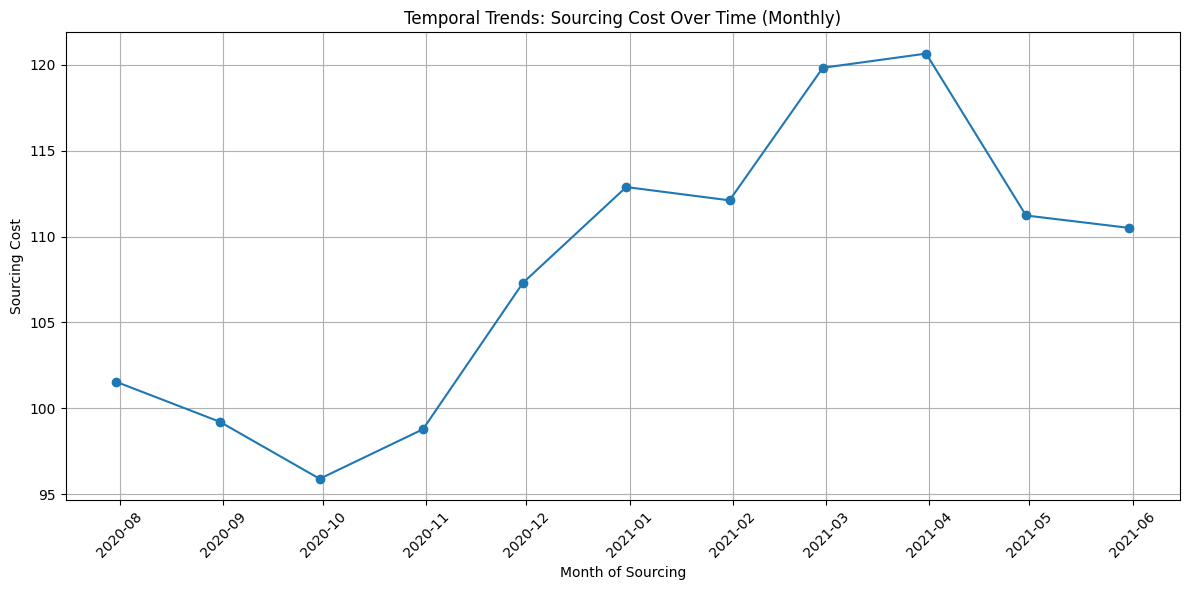

In [84]:
plt.figure(figsize=(12, 6))

# Downsampling to monthly intervals and aggregating by mean
columns_to_drop = ["Area Code", "Month of Sourcing", "Sourcing Month", "Sourcing year"]  # Add other column names as needed
df_encoded_analysis1 = df_encoded.drop(columns_to_drop, axis=1)
monthly_data = df_encoded_analysis1.resample('M', on='Datetime Month of Sourcing').mean()

plt.plot(monthly_data.index, monthly_data['Sourcing Cost'], marker='o', linestyle='-')
plt.title('Temporal Trends: Sourcing Cost Over Time (Monthly)')
plt.xlabel('Month of Sourcing')
plt.ylabel('Sourcing Cost')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid lines for better readability
plt.tight_layout()
plt.show()


This graph shows that the sourcing costs have on an average increased from months in 2020 to 2021. The changes in the soourcing costs could be due to seasonal factors.

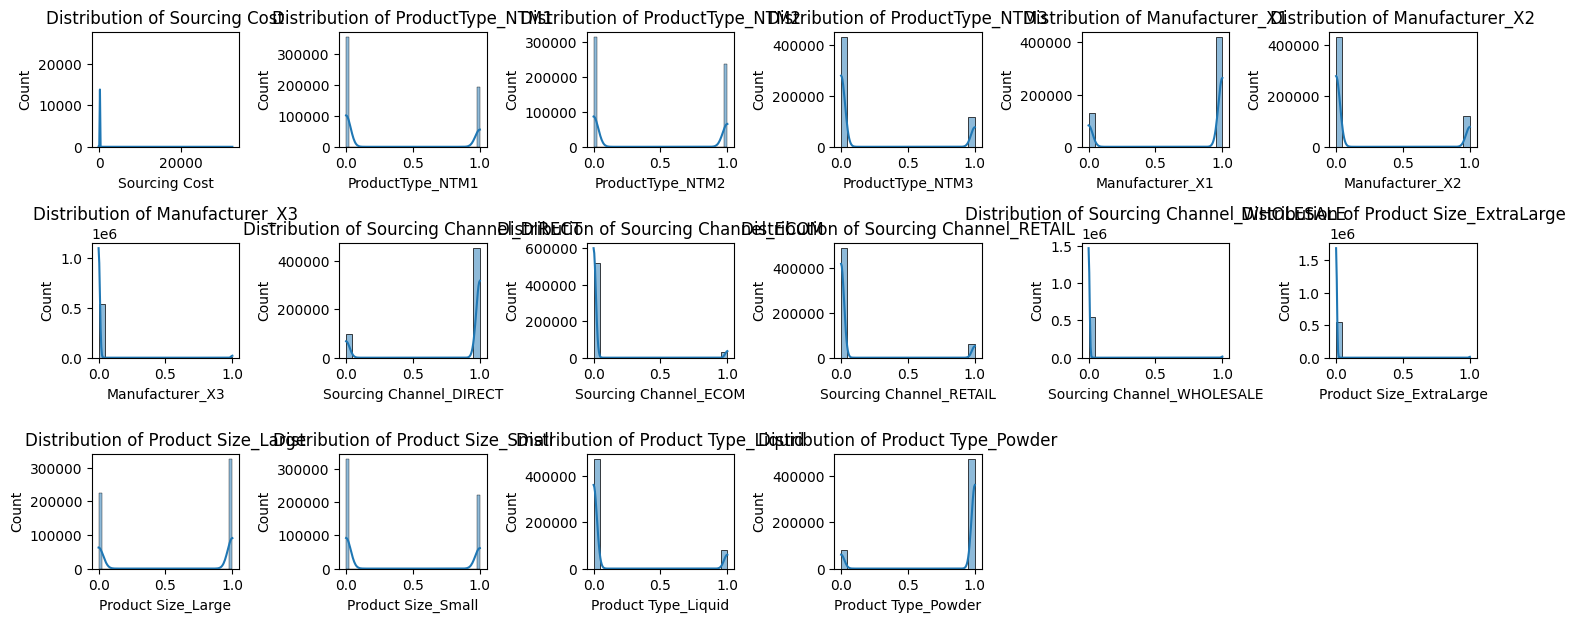

In [88]:
# Plot histograms for numerical features to visualize distribution
numerical_features = df_encoded.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 6, i+1)
    sns.histplot(df_encoded[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [89]:
# Identify outliers using z-score and IQR
outlier_indices_zscore = []
outlier_indices_iqr = []

for feature in numerical_features:
    # Calculate z-score for each data point
    z_scores = np.abs((df_encoded[feature] - df_encoded[feature].mean()) / df_encoded[feature].std())

    # Define threshold for identifying outliers (e.g., z-score > 3)
    outlier_threshold_zscore = 3
    outlier_indices_zscore.extend(np.where(z_scores > outlier_threshold_zscore)[0])

    # Calculate IQR (Interquartile Range)
    Q1 = df_encoded[feature].quantile(0.25)
    Q3 = df_encoded[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define thresholds for identifying outliers using IQR (e.g., Q1 - 1.5*IQR and Q3 + 1.5*IQR)
    lower_threshold_iqr = Q1 - 1.5 * IQR
    upper_threshold_iqr = Q3 + 1.5 * IQR
    outlier_indices_iqr.extend(np.where((df_encoded[feature] < lower_threshold_iqr) | (df_encoded[feature] > upper_threshold_iqr))[0])

Outliers identified using z-score method:
       Area Code Month of Sourcing  Sourcing Cost Datetime Month of Sourcing  \
1098         A29            Dec-20        1033.51                 2020-12-01   
1230         A35            Jan-21         548.62                 2021-01-01   
1267         A29            Jan-21         772.44                 2021-01-01   
1385         A35            Dec-20         891.67                 2020-12-01   
1533         A29            Feb-21         427.94                 2021-02-01   
...          ...               ...            ...                        ...   
549885       A35            Jul-20          57.00                 2020-07-01   
549942       A35            Oct-20        3705.00                 2020-10-01   
550055       A35            Apr-21          57.00                 2021-04-01   
550065       A35            Mar-21          57.00                 2021-03-01   
550088       A35            Dec-20          57.00                 2020-12-01  

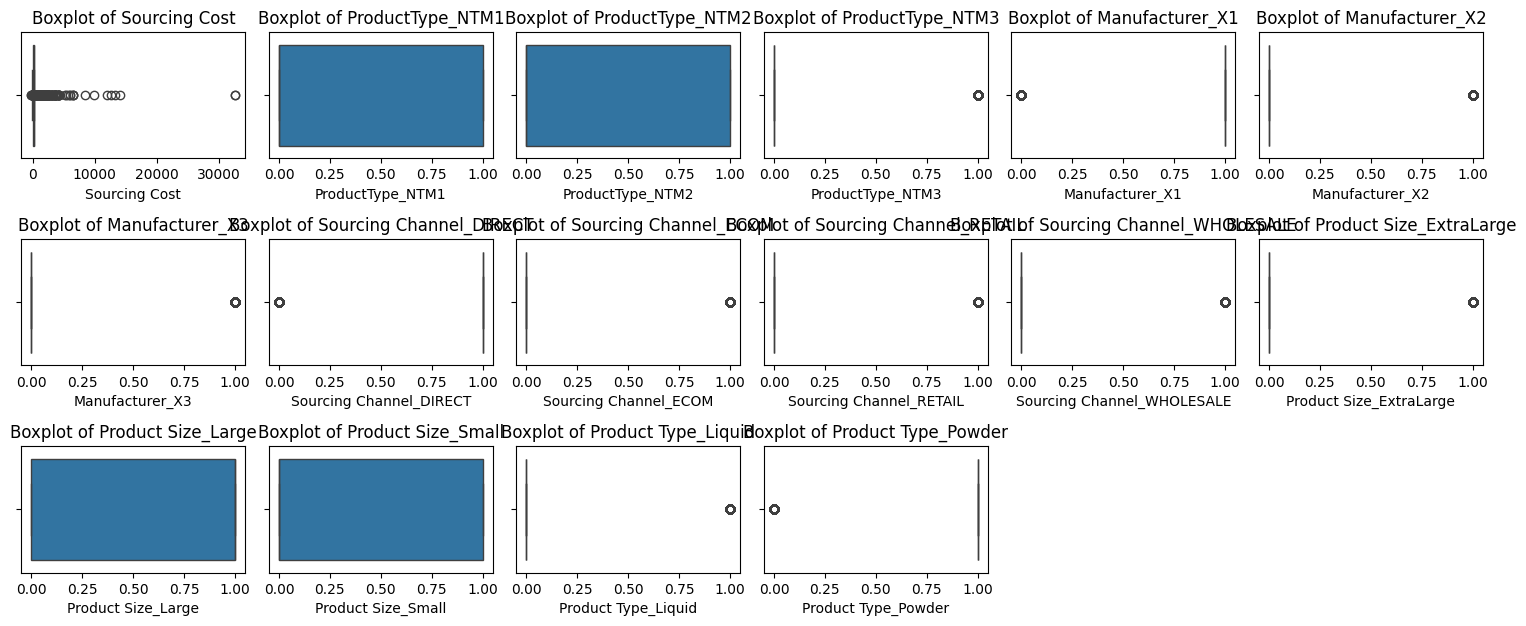

In [90]:
# Display outliers identified using z-score
print("Outliers identified using z-score method:")
print(df_encoded.iloc[outlier_indices_zscore])

feature_values = df_encoded['Sourcing Cost']
z_scores = np.abs((feature_values - feature_values.mean()) / feature_values.std())

# Define threshold for identifying outliers (e.g., z-score > 3)
outlier_threshold = 3

# Count the number of outliers
num_outliers = np.sum(z_scores > outlier_threshold)

print("Number of outliers:", num_outliers)

print()

# Display outliers identified using IQR
print("\nOutliers identified using IQR method:")
print(df_encoded.iloc[outlier_indices_iqr])

# Plot box plots to visualize outliers
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 6, i+1)
    sns.boxplot(x=df_encoded[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

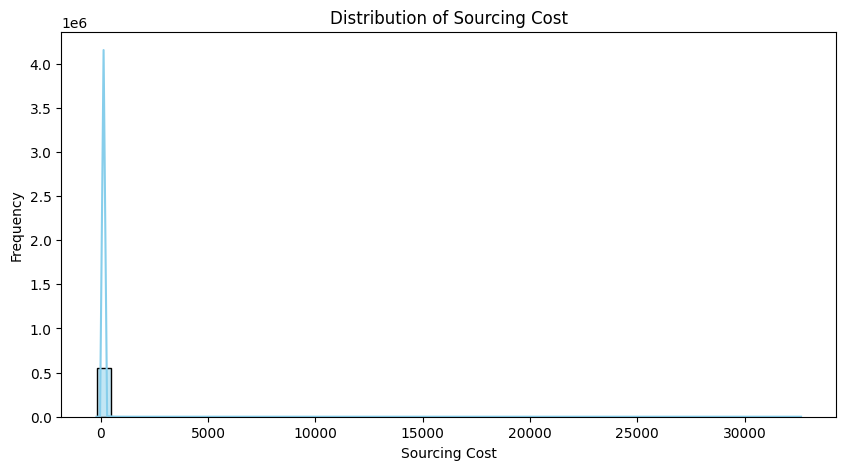

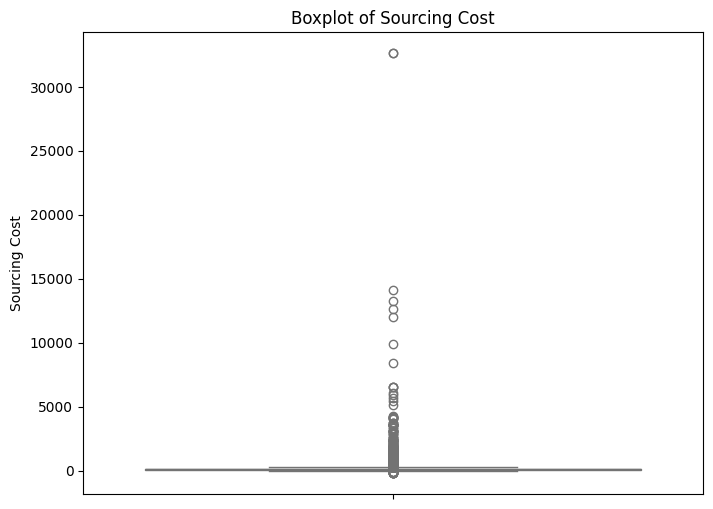

Number of outliers detected using z-score method: 1364
Number of outliers detected using IQR method: 2666


In [91]:
# Z-score method for outlier detection
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    return z_scores > threshold

# IQR method for outlier detection
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    return (data < lower_threshold) | (data > upper_threshold)

# Load your dataset and select the target variable
sourcing_cost = df_encoded['Sourcing Cost']

# Detect outliers using z-score method
outliers_zscore = detect_outliers_zscore(sourcing_cost)

# Detect outliers using IQR method
outliers_iqr = detect_outliers_iqr(sourcing_cost)

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 5))
sns.histplot(sourcing_cost, kde=True, color='skyblue', bins=50)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
plt.show()

# Box plot to visualize outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=sourcing_cost, color='lightgreen')
plt.title('Boxplot of Sourcing Cost')
plt.ylabel('Sourcing Cost')
plt.show()

# Print the number of outliers detected by each method
print("Number of outliers detected using z-score method:", outliers_zscore.sum())
print("Number of outliers detected using IQR method:", outliers_iqr.sum())


In [250]:
#there are 4804 records in Sourcing Cost that have exponentially small values like e^-15. There are also some negative values of Sourcing cost.
#As it seems liek an error in data collection or recording, removing all records where the sourcing cost is 0 or less than 0

#filtering out records where the sourcing cost is greater than 0
filtered_df = df_encoded_analysis[df_encoded_analysis['Sourcing Cost'] > 0]
filtered_test = test_encoded_analysis[test_encoded_analysis['Sourcing Cost'] > 0]
#displaying the shape of the filtered DataFrame
print("Shape of filtered DataFrame:", filtered_df.shape)

Shape of filtered DataFrame: (534400, 17)


In [265]:
#Scaling the target feature having values above 0 as the min value is close to 0 and the highest value is around 32000 and since distribution of values in this range is uniform for each bucket,
#i want to preserve the distribution of and shape of data

scaler = MinMaxScaler()
filtered_df['Sourcing Cost'] = scaler.fit_transform(filtered_df[['Sourcing Cost']])
filtered_test['Sourcing Cost'] = scaler.fit_transform(filtered_test[['Sourcing Cost']])

filtered_df.describe()

<ipython-input-265-752045f9468d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sourcing Cost'] = scaler.fit_transform(filtered_df[['Sourcing Cost']])


,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder,Cluster
count,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000,534400.000000
mean,0.003433,0.361097,0.434042,0.204862,0.766272,0.215719,0.018009,0.822234,0.058207,0.109379,0.010180,0.007760,0.591074,0.401166,0.137017,0.862983,6.430969
std,0.003193,0.480319,0.495631,0.403601,0.423201,0.411320,0.132984,0.382316,0.234135,0.312114,0.100379,0.087749,0.491636,0.490135,0.343866,0.343866,6.785687
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001968,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.004085,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000
75%,0.004495,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,11.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000


In [270]:
filtered_df.describe()['Sourcing Cost']

count    534400.000000
mean          0.003433
std           0.003193
min           0.000000
25%           0.001968
50%           0.004085
75%           0.004495
max           1.000000
Name: Sourcing Cost, dtype: float64

In [269]:
filtered_test.describe()['Sourcing Cost']

count    96.000000
mean      0.442677
std       0.227087
min       0.000000
25%       0.240805
50%       0.490545
75%       0.610552
max       1.000000
Name: Sourcing Cost, dtype: float64

Because of difference in range of sourcing cost in the train and test dataset respectively, there may be issues that will arise during checking the performace of the models.

#Model Selection, Training and Evaluation
For this case, choosing to go with Gradient Boosting Regression, Random Forest and Decision Tree as the given dataset contains both numerical and categorical featuresand could benefit using ensemble methods like Random Forest Regression or Gradient Boosting Regression. To explore the time-series nature of the data, will also be applying the ARIMA model <Br>
Evaluating the models using MSE, RMSE, MAE performance metrics on the test set.

In [253]:
#train-test splitting
X_train = filtered_df.drop('Sourcing Cost', axis=1)
y_train = filtered_df['Sourcing Cost']
X_test = filtered_test.drop('Sourcing Cost', axis=1)
y_test = filtered_test['Sourcing Cost']

In [256]:
X_train

,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder,Cluster
0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,5
1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,8
2,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0
3,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,21
4,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550171,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,14
550172,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0
550173,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,14
550174,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,1


In [257]:
X_test

,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder,Cluster
0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,2
2,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,2
3,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,10
92,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,11
93,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,11
94,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0


In [140]:
#aggregating data by month for the ARIME model
train_data_monthly = filtered_df.groupby(['Datetime Month of Sourcing']).agg({'Sourcing Cost': 'sum'}).reset_index()

**Arima model**

In [141]:
# Defining a range of ARIMA orders to experiment with
orders = [
    (3, 2, 0),
    (3, 2, 1),
    (2, 2, 1),
    (4, 2, 1),
    (1, 1, 1),
    (2, 1, 0),
    (1, 2, 0),
    (3, 1, 1),
    (2, 1, 2),
    (4, 1, 2)
]

#lists to store forecasts and evaluation metrics
all_forecasts = []
all_mse = []
all_mae = []
all_rmse = []

#looping through each order and training ARIMA models
for order in orders:
    model = ARIMA(train_data_monthly['Sourcing Cost'], order=order)
    fit_model = model.fit()
    forecast = fit_model.forecast(steps=len(y_test))
    all_forecasts.append(forecast)

    mse = mean_squared_error(y_test, forecast)
    mae = mean_absolute_error(y_test, forecast)
    rmse = np.sqrt(mse)

    all_mse.append(mse)
    all_mae.append(mae)
    all_rmse.append(rmse)

for i, order in enumerate(orders):
    print(f"Order {order}:")
    print("Mean Squared Error (MSE):", all_mse[i])
    print("Mean Absolute Error (MAE):", all_mae[i])
    print("Root Mean Squared Error (RMSE):", all_rmse[i])
    print()

best_order_index = np.argmin(all_mse)
best_order = orders[best_order_index]
print("Best order for stacking:", best_order)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py

Order (3, 2, 0):
Mean Squared Error (MSE): 47403.53619396089
Mean Absolute Error (MAE): 217.10612637216025
Root Mean Squared Error (RMSE): 217.72353155770944

Order (3, 2, 1):
Mean Squared Error (MSE): 43779.73332801762
Mean Absolute Error (MAE): 208.87963663353025
Root Mean Squared Error (RMSE): 209.2360708100246

Order (2, 2, 1):
Mean Squared Error (MSE): 273157.81476464105
Mean Absolute Error (MAE): 492.96294180360763
Root Mean Squared Error (RMSE): 522.6450179276954

Order (4, 2, 1):
Mean Squared Error (MSE): 41696.21583457008
Mean Absolute Error (MAE): 203.94941413021104
Root Mean Squared Error (RMSE): 204.19651278748637

Order (1, 1, 1):
Mean Squared Error (MSE): 32917.298488871485
Mean Absolute Error (MAE): 181.43109656896277
Root Mean Squared Error (RMSE): 181.4312500339219

Order (2, 1, 0):
Mean Squared Error (MSE): 33843.67345778402
Mean Absolute Error (MAE): 183.9662552715847
Root Mean Squared Error (RMSE): 183.96650091194326

Order (1, 2, 0):
Mean Squared Error (MSE): 12279

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [134]:
#ARIMA model

# Fit ARIMA model
model = ARIMA(train_data_monthly['Sourcing Cost'], order=(1, 1, 1))  # Example parameters, you can adjust
fit_model = model.fit()

# Forecast June 2021 numbers using the trained ARIMA model
forecast = fit_model.forecast(steps=len(X_test))

# Print the forecasted values for June 2021
print("Forecasted Sourcing Costs for June 2021:")
print(forecast)

Forecasted Sourcing Costs for June 2021:
11     181.312981
12     181.700966
13     181.824627
14     181.864042
15     181.876604
          ...    
102    181.882481
103    181.882481
104    181.882481
105    181.882481
106    181.882481
Name: predicted_mean, Length: 96, dtype: float64


In [282]:
# Evaluate forecasted values with actual values from test set
actual_values = y_test
amse = mean_squared_error(actual_values, forecast)
amae = mean_absolute_error(actual_values, forecast)
armse = np.sqrt(amse)

print("Mean Squared Error (MSE):", amse)
print("Mean Absolute Error (MAE):", amae)
print("Root Mean Squared Error (RMSE):", armse)

Mean Squared Error (MSE): 32917.298488871485
Mean Absolute Error (MAE): 181.43109656896277
Root Mean Squared Error (RMSE): 181.4312500339219


In ARIMA Model, the forecasted values have a relatively high error, indicated by the MSE, MAE, and RMSE values. This suggests that the ARIMA model may not be accurately capturing the underlying patterns in the data, and further adjustments or alternative modeling approaches may be necessary.







**Stacked Arima model**

In [ ]:
#Stacking ARIMA Models with different parameters to optimise ARIMA using ensemble methods
models = [
    ARIMA(train_data_monthly['Sourcing Cost'], order=(2, 2, 0)),
    ARIMA(train_data_monthly['Sourcing Cost'], order=(3, 2, 1)),
    ARIMA(train_data_monthly['Sourcing Cost'], order=(1, 1, 1))
]

forecasts = []
for model in models:
    fit_model = model.fit()
    forecast = fit_model.forecast(steps=len(y_test))
    forecasts.append(forecast)

ensemble_forecast = np.mean(forecasts, axis=0)

In [279]:
smse = mean_squared_error(y_test, ensemble_forecast)
smae = mean_absolute_error(y_test, ensemble_forecast)
srmse = np.sqrt(smse)

print("Ensemble Forecasted Sourcing Costs for June 2021:")
print(ensemble_forecast)
print("Mean Squared Error (MSE):", smse)
print("Mean Absolute Error (MAE):", smae)
print("Root Mean Squared Error (RMSE):", srmse)

Ensemble Forecasted Sourcing Costs for June 2021:
[185.39444262 186.36108542 175.7555012  178.00643458 179.58795146
 179.8302315  170.31510621 173.8997097  174.57042    172.85825531
 165.20395151 169.92216358 168.84090903 166.19150653 160.63442955
 165.48798936 162.75669658 160.01237088 156.26997762 160.59058
 156.55960749 154.28734576 151.91705836 155.28039924 150.42120596
 148.94148992 147.42837103 149.65482226 144.46044581 143.86059981
 142.71684895 143.83561007 138.73458276 138.92087264 137.75404518
 137.94183396 133.24752549 134.01123652 132.55816324 132.07196016
 127.9640674  129.04715016 127.17837305 126.29406993 122.82623643
 123.9765034  121.67858541 120.64353079 117.76871486 118.77879958
 116.12338864 115.12644953 112.73114921 113.45960558 110.56776194
 109.72676393 107.6662788  108.04244851 105.05113511 104.41485557
 102.54376322 102.56013508  99.5955264   99.15591241  97.35029624
  97.0470147   94.20692412  93.91679828  92.08701414  91.53313943
  88.87879977  88.67076371  8

Slight improvement with stacking multiple ARIMA Models but model still hasnt generalised well to the data

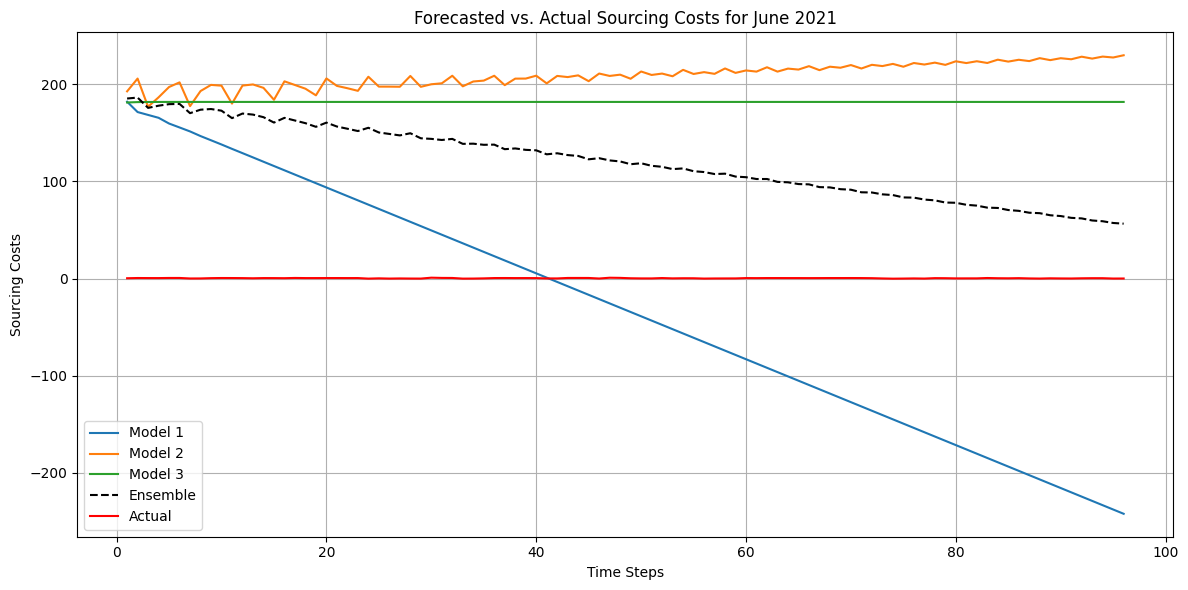

In [212]:
plt.figure(figsize=(12, 6))
for i, forecast in enumerate(forecasts, start=1):
    plt.plot(range(1, len(forecast) + 1), forecast, label=f'Model {i}')

# Plot the ensemble forecast
plt.plot(range(1, len(ensemble_forecast) + 1), ensemble_forecast, label='Ensemble', linestyle='--', color='black')

# Plot the actual values
plt.plot(range(1, len(y_test) + 1), y_test, label='Actual', color='red')

plt.title('Forecasted vs. Actual Sourcing Costs for June 2021')
plt.xlabel('Time Steps')
plt.ylabel('Sourcing Costs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Random Forest Model**

In [286]:
#Random Forest regressor model
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_predictions1 = rf_regressor.predict(X_test)

# Calculating performance metrics
rf_mse = mean_squared_error(y_test, rf_predictions1)
rf_mae = mean_absolute_error(y_test, rf_predictions1)
rf_rmse = mean_squared_error(y_test, rf_predictions1, squared=False)

print("Random Forest Regression MSE:", rf_mse)
print("Random Forest Regression MAE:", rf_mae)
print("Random Forest Regression RMSE:", rf_rmse)

Random Forest Regression MSE: 0.24329595933530868
Random Forest Regression MAE: 0.4391300114010228
Random Forest Regression RMSE: 0.49325040226573424


In [261]:
#hyperparameter tuning the RF model to improve performance
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [None],
    'min_samples_split': [10],
    'min_samples_leaf': [2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_regressor = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(rf_regressor, param_distributions=param_grid, n_iter=15, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_rf_model = random_search.best_estimator_

# Cross-Validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)

print("\nCross-Validation RMSE Scores:", cv_rmse_scores)
print("Mean RMSE Score:", cv_rmse_scores.mean())

rf_predictions = best_rf_model.predict(X_test)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}

Cross-Validation RMSE Scores: [0.00162841 0.00342456 0.0017941  0.00344801 0.00327845]
Mean RMSE Score: 0.002714708267237816


In [280]:
rmse = mean_squared_error(y_test, rf_predictions)
rmae = mean_absolute_error(y_test, rf_predictions)
rrmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", rmse)
print("Mean Absolute Error (MAE):", rmae)
print("Root Mean Squared Error (RMSE):", rrmse)

Mean Squared Error (MSE): 0.2432963337490821
Mean Absolute Error (MAE): 0.43912995165467944
Root Mean Squared Error (RMSE): 0.4932507818028088


**Gradient Boosting Model**

In [259]:
#Gradient Boosting regressor
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train)
gb_predictions = gb_regressor.predict(X_test)

# Calculating performance metrics
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = mean_squared_error(y_test, gb_predictions, squared=False)

print("Gradient Boosting Regression MSE:", gb_mse)
print("Gradient Boosting Regression MAE:", gb_mae)
print("Gradient Boosting Regression RMSE:", gb_rmse)

Gradient Boosting Regression MSE: 0.24337039906529834
Gradient Boosting Regression MAE: 0.43911480260512187
Gradient Boosting Regression RMSE: 0.4933258548518396


In [274]:
# to improve performance of gradient boosting regressor model
param_grid = {
    'learning_rate': uniform(0.01, 0.3),
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['auto', 'sqrt', 'log2']
}

gb_regressor = GradientBoostingRegressor()

# Perform Randomized Search Cross Validation
random_search = RandomizedSearchCV(gb_regressor, param_distributions=param_grid, n_iter=5, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", -random_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'learning_rate': 0.10106781514721692, 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 17, 'n_estimators': 632}
Best Score: 8.046807259490591e-06


In [276]:
# to improve performance of gradient boosting regressor model

param_grid = {
    'n_estimators': [632],
    'learning_rate': [0.10106781514721692],
    'max_depth': [8],
    'min_samples_split': [17],
    'min_samples_leaf': [5],
    'max_features': ['log2'],
    'loss': ['absolute_error']
}

gbr = GradientBoostingRegressor(random_state=42)

random_search = RandomizedSearchCV(gbr, param_distributions=param_grid, n_iter=5, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_gbr_model = random_search.best_estimator_

print("Best Parameters:", best_params)

gbr_predictions = best_gbr_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {'n_estimators': 632, 'min_samples_split': 17, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 8, 'loss': 'absolute_error', 'learning_rate': 0.10106781514721692}


In [277]:
gbr_mse = mean_squared_error(y_test, gbr_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_predictions))

print("\nGradient Boosting Regression MSE:", gbr_mse)
print("Gradient Boosting Regression MAE:", gbr_mae)
print("Gradient Boosting Regression RMSE:", gbr_rmse)


Gradient Boosting Regression MSE: 0.24338302290080094
Gradient Boosting Regression MAE: 0.439271842599086
Gradient Boosting Regression RMSE: 0.4933386493077559


In [287]:
results = {
    "Model": ["ARIMA", "Stacked ARIMA", "Random Forest", "Random Forest(Tuned)", "Gradient Boosting", "Gradient Boosting(Tuned)"],
    "MSE": [amse, smse, rf_mse, rmse, gb_mse, gbr_mse],
    "MAE": [amae, smae, rf_mae, rmae, gb_mae, gbr_mae],
    "RMSE": [armse, srmse, rf_rmse, rrmse, gb_rmse, gbr_rmse]
}

results_df = pd.DataFrame(results)
print(results_df)

                      Model           MSE         MAE        RMSE
0                     ARIMA  32917.298489  181.431097  181.431250
1             Stacked ARIMA  15595.414612  119.262769  124.881602
2             Random Forest      0.243296    0.439130    0.493250
3      Random Forest(Tuned)      0.243296    0.439130    0.493251
4         Gradient Boosting      0.243370    0.439115    0.493326
5  Gradient Boosting(Tuned)      0.243383    0.439272    0.493339


Findings suggest that when forecasting data, out of the models applied, ARIMA Model had the least performance based on the performance metrics while the random forest model, both tuned and untuned exhibited the best performance among all the other models, closely followed by Gradient Boosting regressor.

The reason why the models perfromance metrics seem to be low could be bacase of mismatch in the way the target features values ranges differed in the train and test dataset. Using a log transform or SQRT tranform could help in this case.<br>
Exploring additional features or incorporating domain knowledge could enhance the accuracy of the models and provide more meaningful insights for decision-making.